In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# show up charts when export notebooks
%matplotlib inline

In [3]:
data=pd.read_table('fruit_data_with_colors.txt')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


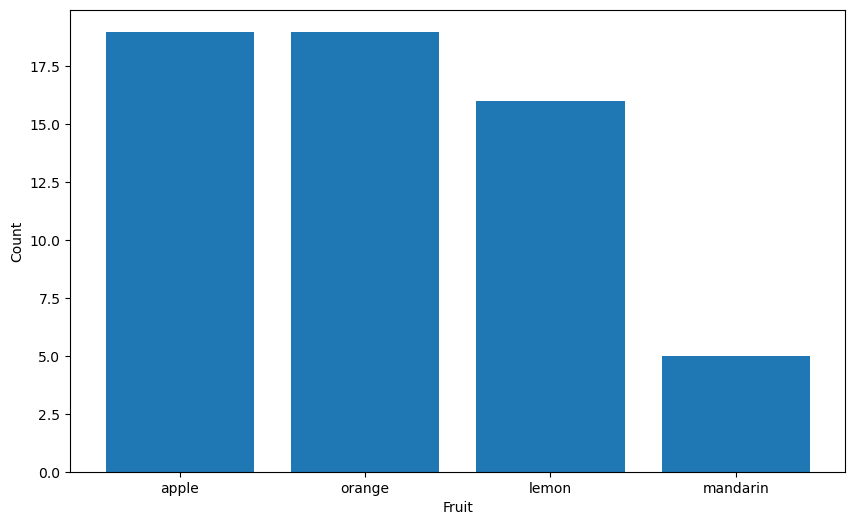

In [4]:
frequency=data['fruit_name'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency)
plt.ylabel("Count")
plt.xlabel("Fruit")
plt.show()

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.info()
data['fruit_name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [7]:
# Outlier function with threshold 2. Function to get list of outliers
def outliers_z_score(df):
    threshold = 2

    mean = np.mean(df)
    std = np.std(df)
    z_scores = [(y - mean) / std for y in df] #Used a Z-Score to remove the outliers
    return np.where(np.abs(z_scores) > threshold)

In [8]:
# Selecting only the numerical columns in data set
my_list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_columns = list(data.select_dtypes(include=my_list).columns)
numerical_columns = data[num_columns]
numerical_columns.head(3)

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60


In [9]:
# Calling the outlier function and Calculating the outlier of dataset
outlier_list = numerical_columns.apply(lambda x: outliers_z_score(x))
outlier_list

,fruit_label,mass,width,height,color_score
0,[],"[24, 25, 26]","[24, 25, 26]","[3, 4, 5, 6, 7, 44]","[0, 1, 2, 8, 10, 11]"


In [10]:
# Making outlier list ot dataframe
df_of_outlier = outlier_list.iloc[0]
df_of_outlier = pd.DataFrame(df_of_outlier)
df_of_outlier.columns = ['Rows_to_exclude']
df_of_outlier

,Rows_to_exclude
fruit_label,[]
mass,"[24, 25, 26]"
width,"[24, 25, 26]"
height,"[3, 4, 5, 6, 7, 44]"
color_score,"[0, 1, 2, 8, 10, 11]"


In [11]:
# Convert all values from column Rows_to_exclude to a numpy array
outlier_list_final = df_of_outlier['Rows_to_exclude'].to_numpy()

# Concatenate a whole sequence of arrays
outlier_list_final = np.concatenate( outlier_list_final, axis=0 )

# Drop duplicate values
outlier_list_final_unique = set(outlier_list_final)
outlier_list_final_unique

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 24, 25, 26, 44}

In [12]:
# Removing outliers from the dataset
filter_rows_to_exclude = data.index.isin(outlier_list_final_unique)
fruits = data[~filter_rows_to_exclude]
fruits.shape

(44, 7)

In [13]:
fruits['fruit_name'].value_counts()

fruit_name
orange    16
lemon     15
apple     13
Name: count, dtype: int64

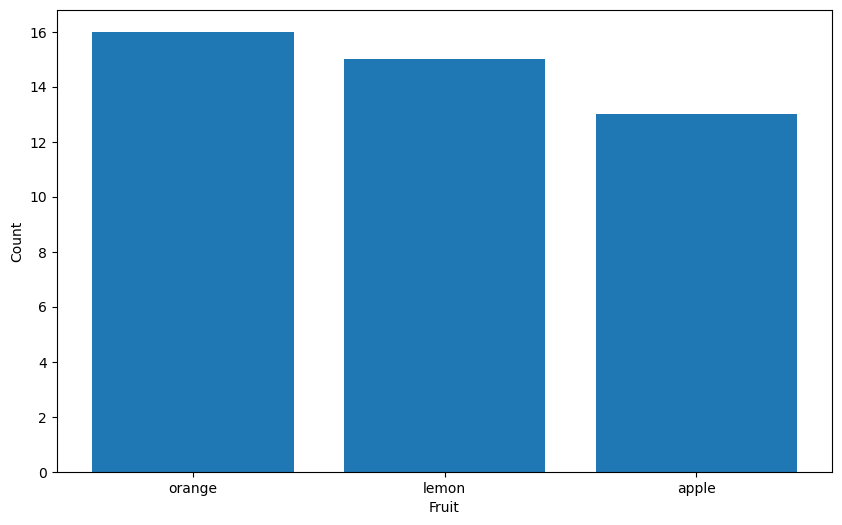

In [14]:
frequency=fruits['fruit_name'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency)
plt.ylabel("Count")
plt.xlabel("Fruit")
plt.show()

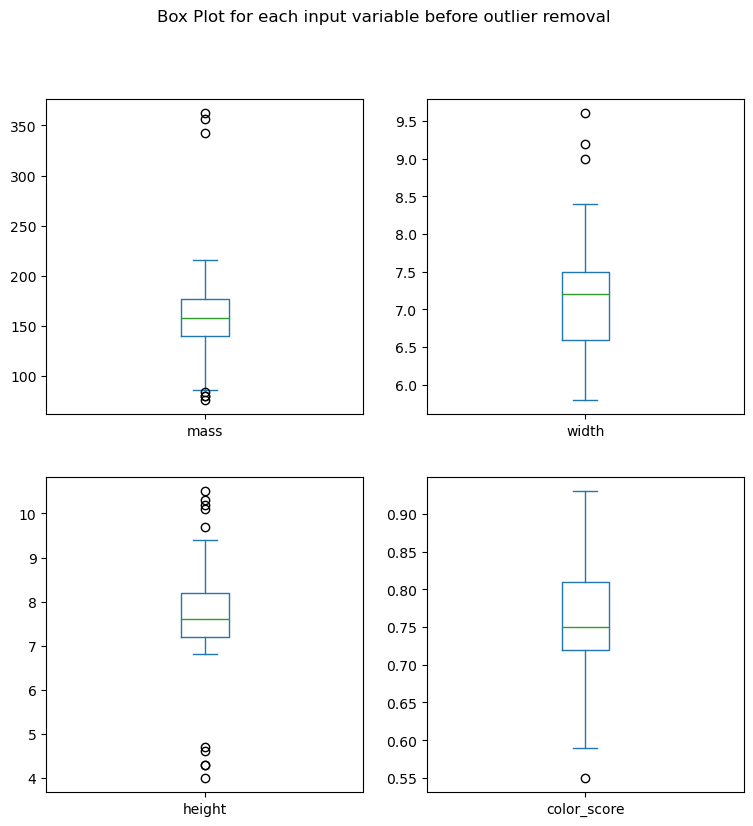

In [15]:
data.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable before outlier removal')
plt.savefig('fruits_box')
plt.show()

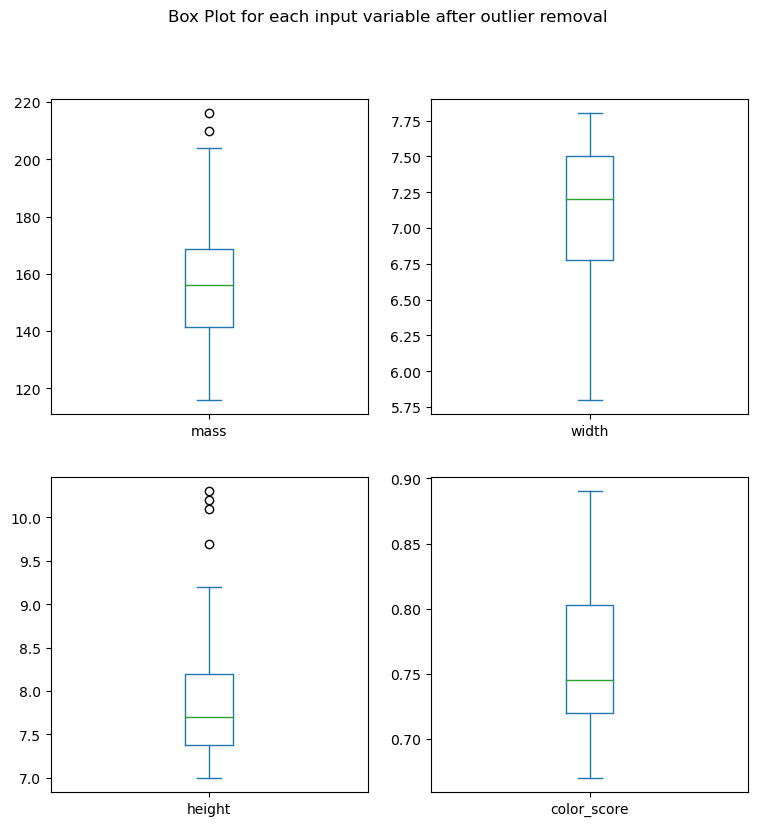

In [16]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable after outlier removal')
plt.savefig('fruits_box')
plt.show()

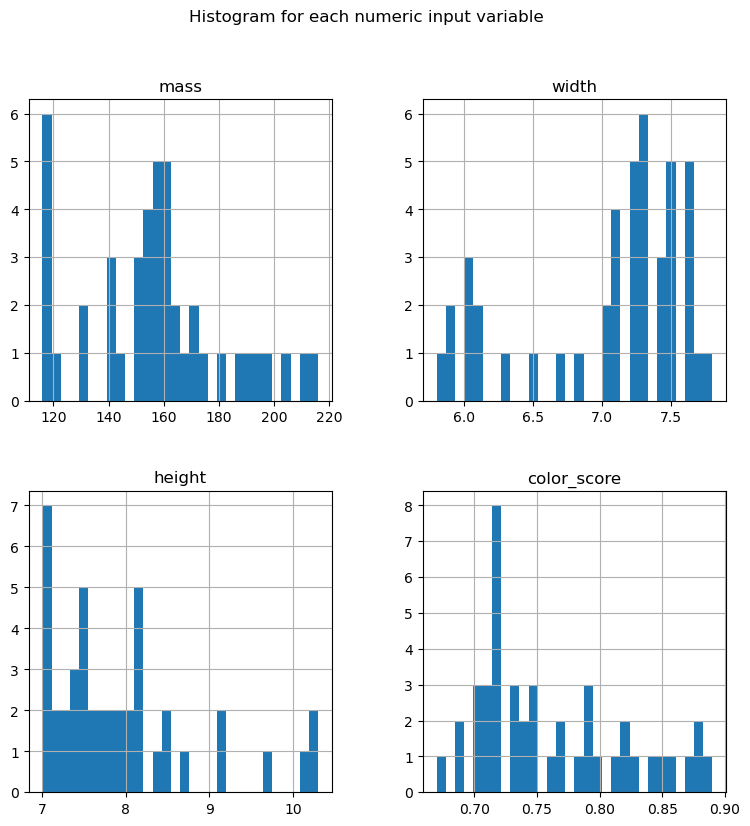

In [17]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

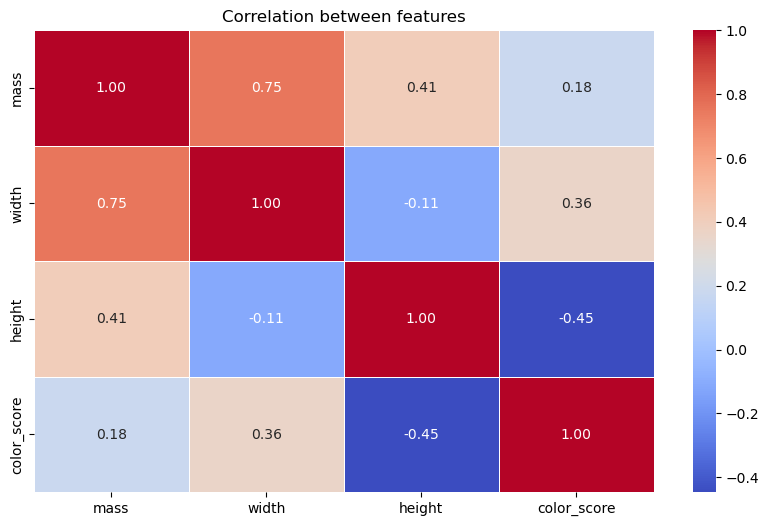

In [18]:
feature_names = ['mass', 'width', 'height', 'color_score']
df=fruits[feature_names]
correlation_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation between features')
plt.show()


In [19]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2.750000,156.681818,7.034091,7.947727,0.762727
std,1.222369,25.710167,0.585461,0.871910,0.059898
min,1.000000,116.000000,5.800000,7.000000,0.670000
25%,1.000000,141.500000,6.775000,7.375000,0.720000
50%,3.000000,156.000000,7.200000,7.700000,0.745000
75%,4.000000,168.500000,7.500000,8.200000,0.802500
max,4.000000,216.000000,7.800000,10.300000,0.890000


## Classification

In [20]:
from sklearn.model_selection import train_test_split
X=fruits[feature_names]
y=fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [22]:
# Logistic Regression
logreg = LogisticRegression(multi_class='auto',solver='lbfgs')
logreg.fit(X_train, y_train)
predictions=logreg.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Multi-Class Logistic Regression Accuracy:", accuracy)

Multi-Class Logistic Regression Accuracy: 0.7272727272727273


In [23]:
# SVM Classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy of linear kernel:", svm_accuracy)

# SVM Classifier
svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy of rbf kernel:", svm_accuracy)

# SVM Classifier
svm_classifier = svm.SVC(kernel='poly')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy for polynomial kernel:", svm_accuracy)

svm_classifier = svm.SVC(kernel='sigmoid')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy for sigmoid kernel:", svm_accuracy)

SVM Accuracy of linear kernel: 0.5454545454545454
SVM Accuracy of rbf kernel: 1.0
SVM Accuracy for polynomial kernel: 1.0
SVM Accuracy for sigmoid kernel: 0.6363636363636364


In [24]:
# KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("k-NN Accuracy:", accuracy)


k-NN Accuracy: 0.8181818181818182


In [32]:
# Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train,y_train)
predictions=naive_bayes_classifier.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.9090909090909091


## Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each classifier
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
logistic_param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Perform grid search for each classifier
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

logistic_grid_search = GridSearchCV(logreg, logistic_param_grid, cv=5)
logistic_grid_search.fit(X_train, y_train)

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get best hyperparameters and evaluate on test set
best_svm_classifier = svm_grid_search.best_estimator_
best_svm_predictions = best_svm_classifier.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, best_svm_predictions)
print("Best SVM Accuracy:", best_svm_accuracy)
print("Best SVM Parameters:", svm_grid_search.best_params_)

best_logistic_regression_classifier = logistic_grid_search.best_estimator_
best_logistic_regression_predictions = best_logistic_regression_classifier.predict(X_test)
best_logistic_regression_accuracy = accuracy_score(y_test, best_logistic_regression_predictions)
print("Best Logistic Regression Accuracy:", best_logistic_regression_accuracy)
print("Best Logistic Regression Parameters:", logistic_grid_search.best_params_)

best_knn_classifier = knn_grid_search.best_estimator_
best_knn_predictions = best_knn_classifier.predict(X_test)
best_knn_accuracy = accuracy_score(y_test, best_knn_predictions)
print("Best k-NN Accuracy:", best_knn_accuracy)
print("Best k-NN Parameters:", knn_grid_search.best_params_)

Best SVM Accuracy: 0.9090909090909091
Best SVM Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Logistic Regression Accuracy: 0.9090909090909091
Best Logistic Regression Parameters: {'C': 100, 'solver': 'liblinear'}
Best k-NN Accuracy: 1.0
Best k-NN Parameters: {'n_neighbors': 3, 'weights': 'distance'}


## Cross validation

In [26]:
logreg=LogisticRegression(multi_class='auto',solver='lbfgs',max_iter=1000)
score=cross_val_score(logreg,X,y,cv=5)
accuracy=score.mean()
print("Logistic Regression Cross-Validation Mean Accuracy",accuracy)

Logistic Regression Cross-Validation Mean Accuracy 0.7055555555555555


In [27]:
svm_classifier=svm.SVC(kernel='linear')
score=cross_val_score(svm_classifier,X,y,cv=5)
accuracy=score.mean()
print("SVM Cross-Validation Mean Accuracy",accuracy)

SVM Cross-Validation Mean Accuracy 0.7722222222222223


In [28]:
knn=KNeighborsClassifier(n_neighbors=5)
score=cross_val_score(knn,X,y,cv=5)
accuracy=score.mean()
print("KNN Cross-Validation Mean Accuracy",accuracy)

KNN Cross-Validation Mean Accuracy 0.4527777777777778


## Plotting

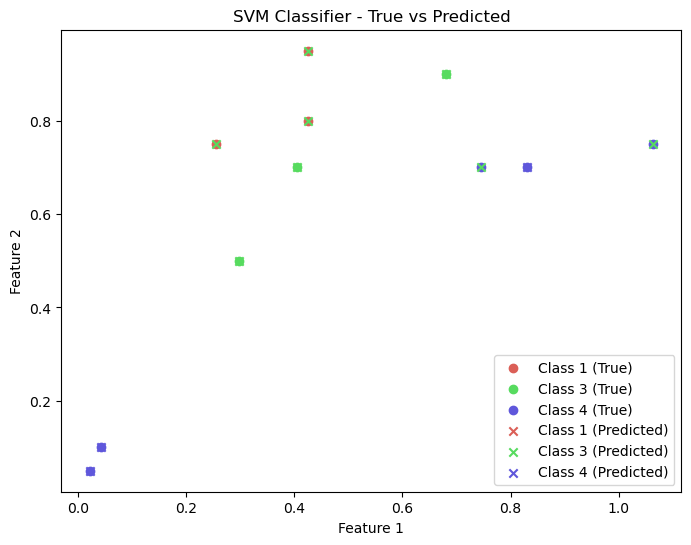

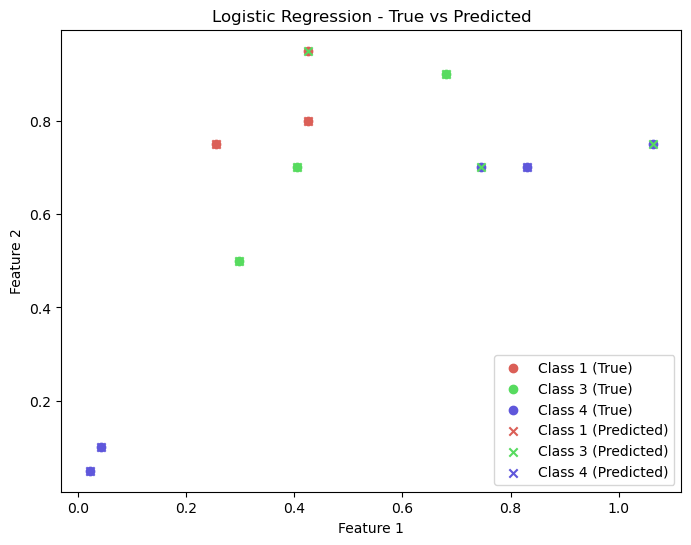

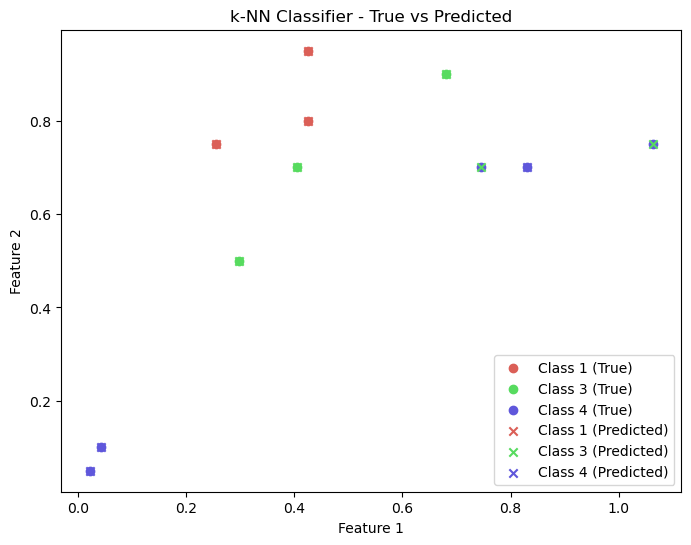

In [29]:
# Function to plot data points with true and predicted labels
def plot_data_points(X, y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    unique_classes = np.unique(y_true)
    colors = sns.color_palette("hls", len(unique_classes))
    for i, class_label in enumerate(unique_classes):
        X_class = X[y_true == class_label]
        plt.scatter(X_class[:, 0], X_class[:, 1], color=colors[i], label=f"Class {class_label} (True)")
    for i, class_label in enumerate(unique_classes):
        X_class_pred = X[y_pred == class_label]
        plt.scatter(X_class_pred[:, 0], X_class_pred[:, 1], color=colors[i], marker='x', label=f"Class {class_label} (Predicted)")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# SVM Classifier
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
plot_data_points(X_test, y_test, svm_predictions, "SVM Classifier - True vs Predicted")

# Logistic Regression
logreg.fit(X_train, y_train)
logistic_regression_predictions = logreg.predict(X_test)
plot_data_points(X_test, y_test, logistic_regression_predictions, "Logistic Regression - True vs Predicted")

# k-Nearest Neighbors (k-NN) Classifier
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
plot_data_points(X_test, y_test, knn_predictions, "k-NN Classifier - True vs Predicted")


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    report = classification_report(y_true, y_pred)

    print(title)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Classification Report:")
    print(report)
    print()

# Evaluate SVM Classifier
evaluate_model(y_test, svm_predictions, "SVM Classifier Evaluation")

# Evaluate Logistic Regression
evaluate_model(y_test, logistic_regression_predictions, "Logistic Regression Evaluation")


# Evaluate k-Nearest Neighbors (k-NN) Classifier
evaluate_model(y_test, knn_predictions, "k-NN Classifier Evaluation")


SVM Classifier Evaluation
Accuracy: 0.5454545454545454
Precision: 0.5568181818181818
Recall: 0.5454545454545454
F1 Score: 0.48966942148760323
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           3       0.38      1.00      0.55         3
           4       1.00      0.60      0.75         5

    accuracy                           0.55        11
   macro avg       0.46      0.53      0.43        11
weighted avg       0.56      0.55      0.49        11


Logistic Regression Evaluation
Accuracy: 0.7272727272727273
Precision: 0.8636363636363636
Recall: 0.7272727272727273
F1 Score: 0.740909090909091
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           3       0.50      1.00      0.67         3
           4       1.00      0.60      0.75         5

    accuracy                           0.73        11
   macro avg 

C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\metrics\_classifi